# Day 5 — Gradient Boosting: Introduction to Boosting
### Machine Learning Roadmap — Week 4
### Author — N Manish Kumar
---

So far we have studied Random Forests, which use **bagging**:
- Many trees are trained independently
- Their predictions are averaged
- Variance is reduced

Boosting follows a very different idea.

In **Gradient Boosting**, trees are trained sequentially:
- Each new tree focuses on correcting errors made by previous trees
- Weak learners are combined to form a strong learner
- The model gradually improves step-by-step

In this notebook, we will:
- Train a Gradient Boosting model
- Compare it with Random Forest
- Understand when boosting performs better
- Analyze bias–variance behavior

Dataset used: **Breast Cancer Dataset (sklearn)**

---

## 1. Dataset Loading and Train/test Split

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (455, 30)
Test set shape: (114, 30)


---
## 2. Training Gradient Boosting and Comparing with Random Forest

Random Forest and Gradient Boosting are both ensemble methods, but they work
very differently:

- Random Forest uses bagging: many trees trained independently and averaged.
- Gradient Boosting builds trees sequentially, each one correcting errors of
  the previous ensemble.

To understand these differences in practice, we train both models using the
same data and compare their performance on the test set.


In [3]:
# Train Random Forest for comparison
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train,y_train)

# Train Gradient Boosting
gb = GradientBoostingClassifier(
    n_estimators=200,
    random_state=42,
    learning_rate=0.1
)
gb.fit(X_train,y_train)

# Evaluate both models
rf_train = accuracy_score(y_train,rf.predict(X_train))
rf_test = accuracy_score(y_test,rf.predict(X_test))

gb_train = accuracy_score(y_train,rf.predict(X_train))
gb_test = accuracy_score(y_test,rf.predict(X_test))

print("Random Forest -> Train:", rf_train, "Test:", rf_test)
print("Gradient Boosting -> Train:", gb_train, "Test:", gb_test)

Random Forest -> Train: 1.0 Test: 0.956140350877193
Gradient Boosting -> Train: 1.0 Test: 0.956140350877193


### Interpretation

Random Forest often shows very high training accuracy because each tree can
memorize patterns independently.

Gradient Boosting usually increases accuracy more gradually, since each tree
is trained to correct previous mistakes rather than fit data independently.

If Gradient Boosting achieves higher test accuracy than Random Forest, it
indicates that sequential learning was able to capture more refined patterns.

However, boosting models are also more prone to overfitting if too many trees
or a high learning rate are used.

---

## 3. Effect of Learning Rate in Gradient Boosting

In Gradient Boosting, trees are added sequentially.  
Each new tree tries to correct the errors made by the previous ensemble.

The **learning rate** controls how much each new tree influences the final model:

- High learning rate → faster learning but higher risk of overfitting  
- Low learning rate → slower, more stable learning but may need more trees

To understand this trade-off, we train Gradient Boosting models with
different learning rates and compare their performance.


In [4]:
learning_rates = [0.01,0.05,0.1,0.2]

for lr in learning_rates:
    gb_tmp = GradientBoostingClassifier(
        n_estimators=42,
        learning_rate = lr,
        random_state=42
    )
    gb_tmp.fit(X_train,y_train)

    train_acc = accuracy_score(y_train,gb.predict(X_train))
    test_acc = accuracy_score(y_test, gb.predict(X_test))

    print(f"Learning Rate: {lr}, Train Acc: {train_acc:.3f}, Test Acc: {test_acc:.3f}")

Learning Rate: 0.01, Train Acc: 1.000, Test Acc: 0.956
Learning Rate: 0.05, Train Acc: 1.000, Test Acc: 0.956
Learning Rate: 0.1, Train Acc: 1.000, Test Acc: 0.956
Learning Rate: 0.2, Train Acc: 1.000, Test Acc: 0.956


### Interpretation

Lower learning rates usually lead to:
- More stable models
- Lower risk of overfitting
- Need for more trees to reach good performance

Higher learning rates may:
- Reach high accuracy quickly
- But can overfit or behave less predictably

In practice, small learning rates (0.05 or 0.1) with enough trees often
provide the best balance between accuracy and generalization.

---

## 4. Feature Importance in Gradient Boosting

Just like Random Forests, Gradient Boosting models can also provide
built-in feature importance scores based on how much each feature contributes
to reducing error across sequential trees.

However, because boosting builds trees sequentially to correct mistakes,
its importance rankings can differ significantly from Random Forest.

We extract and visualize feature importance from the Gradient Boosting model
and compare it with the Random Forest importance from earlier.


In [5]:
gb_importance = gb.feature_importances_

gb_imp_df = pd.DataFrame({
    "Feature": data.feature_names,
    "Importance": gb_importance
}).sort_values(by="Importance",ascending = False)

gb_imp_df.head(10)

,Feature,Importance
20,worst radius,0.435471
22,worst perimeter,0.271465
27,worst concave points,0.106543
21,worst texture,0.052636
7,mean concave points,0.030458
11,texture error,0.026926
23,worst area,0.022316
26,worst concavity,0.010820
24,worst smoothness,0.010708
13,area error,0.005350


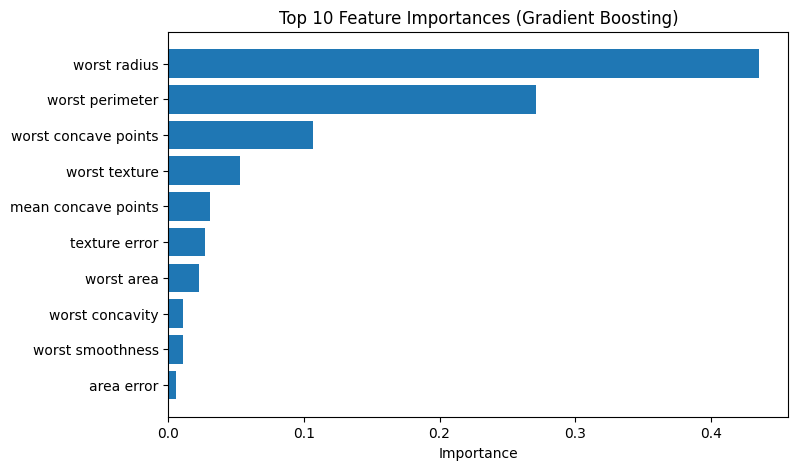

In [6]:
# Plot top 10 Gradient Boosting features
top_gb = gb_imp_df.head(10)

plt.figure(figsize=(8,5))


### Interpretation

Gradient Boosting often concentrates importance on a smaller subset of
highly predictive features because each tree focuses on correcting specific
errors from previous trees.

Random Forest importance tends to be more spread out since trees are built
independently and averaged.

Differences between the two methods highlight how ensemble strategy affects
which features the model relies on most.

---

## Notebook Summary — Week 4 Day 5

In this notebook, we explored Gradient Boosting as an alternative ensemble
method to Random Forests and studied how boosting differs from bagging.

### What was done
- Trained a Random Forest model as baseline
- Trained a Gradient Boosting model on the same dataset
- Compared training and test performance of both methods
- Studied the effect of learning rate on Gradient Boosting performance
- Extracted and analyzed feature importance from Gradient Boosting

### Key Learnings
- Random Forest reduces variance through independent trees and averaging
- Gradient Boosting reduces bias by sequentially correcting errors
- Learning rate controls stability and overfitting in boosting
- Lower learning rates with more trees often give better generalization
- Boosting and bagging may highlight different important features

### Final Outcome
Gradient Boosting demonstrated how sequential ensemble learning can often
achieve higher accuracy than bagging methods, making it a powerful technique
for structured machine learning problems.